![alt text](img3.png "Mean NBA Salary Over Time")
<div style="text-align: center;">
            
<h1> NBA Centers: What goes into their salaries, and why are they paid so much? </h1>
<h2>A Basketball Analysis</h2>

<h4>Authors: Perri Smith, Srivats Narasimhan, Nisarg Joshi</h4>

</div>

***

<h1 style="text-align: center;">Introduction<h1>  


Basketball is one of most popular sports in the world. One of the many fascinating sides to the game is how rich basketball is with numerous statistics that provide many invaluable insights into player and team performances. The NBA is known for providing incredible compensations to players, rightfully so. As data scientists, our objective for this project was to take a closer look at to what degree various player performance statistics play a role in indicating their respective salaries. 

A recent phenomenon within the NBA, particularly since 2015, shows a steep increase in the salaries of Centers, out of all the other positions on the court. 

This is particularly interesting, as recently basketball has also changed to become more “position-less”; players are more versatile than ever with their primary objective being to maximize field goals, taking on multiple roles rather than strictly duties traditionally associated with their position. Given the prevalance of players like Stephen Curry and James Harden in basketball media, it is certainly surprising to see that Centers are, on average, paid more than the rest of hte league. 

Because of this, concern about particular player statistics being more or less relevant towards particular positions is more negligible. Instead, they can be more indicative of all players. Consequently, for the purposes of focus and simplicity, we will be looking at basketball players who only play as centers and their respective salaries and stats; this should provide us a big picture extending to the relationship between compensation and stats for all NBA players in general. We also want to find out exactly why NBA Centers are paid more than the rest of the league -- we will delve into what exactly goes into their high salaries, and what they must do well in order to get their bread!

We will be using Python, along with its associated data analysis libraries, Pandas and Numpy, to start our analysis. Our dataset is composed of NBA player data from the 2017-2018 season, listing the players, their position, some demographic information, and a lot of different statistics. 

![alt text](img2.png "Mean NBA Salary Over Time")
Source: http://harvardsportsanalysis.org/2018/10/wanna-make-money-in-the-nba-be-a-center/

***

<h1 style="text-align: center;">1. Data Collection and Processing<h1>

## 1.1 Required Libraries for the Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

- Pandas: used for displaying our data and partitioning
- Matplotlib - pyplot: used for plotting our data into pretty graphs and charts
- Seaborn: graphics on top of matplotlib
- scikit-learn: ML Libraries
    - linear-model: used to calculate our models for our multiple linear regression
    - model_selection: used to split up dataset into test and training data and evaluate predictions
- statsmodels - api: used to calculate models/stats with multple linear regression
- Seaborn: provides a high-level interface for graphics on top of Matplotlib

## 1.2 Data Source 

https://www.kaggle.com/meicher/201718-advanced-player-metrics-salary

In order to properly assess the relationship between players, their respective stats, and salaries, we needed to find an appropriate dataset that contains this information in a consolidated, intuitive fashion. The most recent NBA season for which we were able to find this was the 2017-2018 season -- which, for our purposes, is acceptable! By the 2017-2018 season, prevailing sentiment about position-less basketball more-or-less existed, allowing us to accurately assess whatever we need to with relevant, properly reflective data. 

In [2]:
data = pd.read_csv("data.csv", encoding = "ISO-8859-1")
data.head()

,Player,NBA_Country,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Pos,Age,Tm,G,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,China,43,"$815,615",MLE,"$815,615",C,22,HOU,16,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,Georgia,42,"$3,477,600",NaN,"$3,477,600",C,33,GSW,66,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,USA,19,"$12,307,692",Cap space,"$24,000,000",PF,36,SAC,59,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,USA,13,"$3,202,217",1st Round Pick,"$3,202,217",SG,22,CHI,24,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,USA,10,"$3,057,240",1st Round Pick,"$6,686,160",C,20,POR,62,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


## 1.3 Tidying our Data

In [3]:
data['Salary'].dtype.kind

'O'

We can see above that the type of our <u>Salary</u> column is type <i>Object</i>. This will cause issues when trying to graph numerically. Let's change this to a float.

In [4]:
data['Salary'] = data[data.columns[3]].replace('[\$,]', '', regex=True).astype(float)
data.head()

,Player,NBA_Country,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Pos,Age,Tm,G,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,China,43,815615.0,MLE,"$815,615",C,22,HOU,16,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,Georgia,42,3477600.0,NaN,"$3,477,600",C,33,GSW,66,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,USA,19,12307692.0,Cap space,"$24,000,000",PF,36,SAC,59,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,USA,13,3202217.0,1st Round Pick,"$3,202,217",SG,22,CHI,24,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,USA,10,3057240.0,1st Round Pick,"$6,686,160",C,20,POR,62,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


We then have filter the data to not only just include centers, but also remove duplicate players. (players that were traded through a single season should only be included once, not multiple times!) For the duplicate players, their aggregate stats from the whole season (with them playing on multiple teams) are listed under their team name 'TOT' -- this indicates their TOTAL stats from the whole season. Finally, we're going to drop players who played in less than 20 games. This is because we don't want outliers (maybe someone shot really well for a few games, but we don't want that skewing our dataset when we perform our regressions later on). 

In [5]:
#only include centers in the dataframe
df = data[data.Pos == 'C'].reset_index(drop=True)

#drop duplicate players (players included more than once)
duplicate_players = []

for index,row in df.iterrows(): 
    for index2, row2 in df.iterrows():
        if row['Player'] == row2['Player'] and index != index2 and row['Player'] not in duplicate_players:
            duplicate_players.append(row['Player'])

for dup in duplicate_players: 
    for index,row in df.iterrows():
        if dup == row['Player'] and row['Tm'] != 'TOT':
            df = df.drop(index)
            
#dropping players that played less than 20 games 
for index,row in df.iterrows(): 
    if row['G'] < 20: 
        df = df.drop(index)
df


,Player,NBA_Country,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Pos,Age,Tm,G,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
1,Zaza Pachulia,Georgia,42,3477600.0,NaN,"$3,477,600",C,33,GSW,66,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Collins,USA,10,3057240.0,1st Round Pick,"$6,686,160",C,20,POR,62,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2
3,Willy Hernangomez,Spain,35,1435750.0,Cap Space,"$2,980,701",C,23,TOT,45,...,15.4,21.7,0.8,0.6,1.4,0.156,-0.1,0.6,0.5,0.3
7,Willie Reed,USA,62,1577230.0,NaN,"$1,577,230",C,27,TOT,42,...,11.6,16.6,1.0,0.5,1.6,0.175,-0.8,0.0,-0.8,0.1
9,Willie Cauley-Stein,USA,6,3704160.0,1st round pick,"$8,401,035",C,24,SAC,70,...,11.3,21.6,1.3,2.0,3.3,0.082,-1.6,1.6,0.0,1.0
11,Tyson Chandler,USA,2,13000000.0,Cap Space,"$26,585,000",C,35,PHO,46,...,20.5,10.6,1.9,0.8,2.6,0.110,-1.4,1.0,-0.4,0.5
13,Tyler Zeller,USA,17,1709538.0,NaN,"$1,709,538",C,28,TOT,62,...,11.3,17.0,1.7,0.8,2.5,0.119,-1.3,-0.5,-1.8,0.0
15,Tristan Thompson,Canada,4,16400000.0,Bird Rights,"$52,408,695",C,26,CLE,49,...,12.2,12.5,1.7,0.7,2.4,0.115,-1.6,-0.7,-2.3,-0.1
17,Timofey Mozgov,Russia,62,15280000.0,Cap Space,"$48,000,000",C,31,BRK,28,...,24.4,16.2,-0.1,0.3,0.2,0.026,-4.8,-0.6,-5.4,-0.3
18,Thon Maker,South Sudan,10,2684160.0,1st Round pick,"$5,483,880",C,20,MIL,71,...,10.8,14.6,0.4,1.1,1.5,0.061,-2.5,0.1,-2.4,-0.1


Now, we're going to drop all the columns that we're not going to use for the rest of our tutorial. 

In [6]:
df = df[['Player','Salary','Pos', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'OWS', 'DWS', 'WS', 'VORP']]
df

,Player,Salary,Pos,PER,TS%,3PAr,FTr,ORB%,DRB%,AST%,STL%,BLK%,TOV%,OWS,DWS,WS,VORP
1,Zaza Pachulia,3477600.0,C,16.8,0.608,0.004,0.337,11.0,25.0,15.4,1.9,1.3,19.3,1.7,1.4,3.1,0.7
2,Zach Collins,3057240.0,C,8.2,0.487,0.387,0.146,4.9,18.3,7.3,0.8,2.5,15.6,-0.4,1.2,0.8,-0.2
3,Willy Hernangomez,1435750.0,C,20.6,0.592,0.075,0.555,13.6,25.2,11.0,1.8,2.8,15.4,0.8,0.6,1.4,0.3
7,Willie Reed,1577230.0,C,19.2,0.671,0.017,0.455,9.1,21.7,3.6,1.0,4.3,11.6,1.0,0.5,1.6,0.1
9,Willie Cauley-Stein,3704160.0,C,17.1,0.523,0.017,0.320,7.2,21.7,13.5,1.9,3.1,11.3,1.3,2.0,3.3,1.0
11,Tyson Chandler,13000000.0,C,14.3,0.657,0.000,0.503,12.2,26.9,6.6,0.7,1.9,20.5,1.9,0.8,2.6,0.5
13,Tyler Zeller,1709538.0,C,15.9,0.585,0.088,0.241,11.0,19.6,6.8,0.7,2.5,11.3,1.7,0.8,2.5,0.0
15,Tristan Thompson,16400000.0,C,13.7,0.573,0.000,0.349,13.3,23.6,4.2,0.8,1.4,12.2,1.7,0.7,2.4,-0.1
17,Timofey Mozgov,15280000.0,C,10.2,0.589,0.212,0.294,8.7,18.7,3.6,0.7,2.4,24.4,-0.1,0.3,0.2,-0.3
18,Thon Maker,2684160.0,C,10.5,0.502,0.326,0.293,7.3,14.4,5.3,1.6,3.7,10.8,0.4,1.1,1.5,-0.1


You can refer to https://www.basketball-reference.com/about/glossary.html for a more in-depth description about the stats that we decided to choose. Here are some descriptions about our metrics: 

- PER: The PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance.
- TS%: True Shooting Percentage; the formula is PTS / (2 * TSA). True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.
- 3PAr: 3 point field goal percentage
- FTr: Free throw field goal percentage
- ORB%: Offensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (ORB * (Tm MP / 5)) / (MP * (Tm ORB + Opp DRB)). Offensive rebound percentage is an estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.
- DRB%: Defensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (DRB * (Tm MP / 5)) / (MP * (Tm DRB + Opp ORB)). Defensive rebound percentage is an estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor. 
- AST%: Assist Percentage (available since the 1964-65 season in the NBA); the formula is 100 * AST / (((MP / (Tm MP / 5)) * Tm FG) - FG). Assist percentage is an estimate of the percentage of teammate field goals a player assisted while he was on the floor.
- STL%: Steal Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (STL * (Tm MP / 5)) / (MP * Opp Poss). Steal Percentage is an estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.
- BLK%: Block Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (BLK * (Tm MP / 5)) / (MP * (Opp FGA - Opp 3PA)). Block percentage is an estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor.
- TOV%: Turnover Percentage (available since the 1977-78 season in the NBA); the formula is 100 * TOV / (FGA + 0.44 * FTA + TOV). Turnover percentage is an estimate of turnovers per 100 plays.
- OWS: Offensive Win Shares
- DWS: Defensive Win Shares
- WS: An estimate of the number of wins contributed by a player.
- VORP: Value Over Replacement Player (available since the 1973-74 season in the NBA); a box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season. Multiply by 2.70 to convert to wins over replacement.

***

<h1 style="text-align: center;">2. Exploratory Analysis & Data Visualization<h1>

Let's take a look at the distribution of player salaries in the form of a histogram:

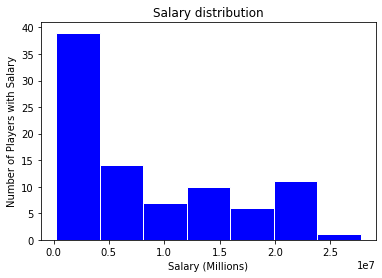

In [21]:
fig=plt.figure() 
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(df['Salary'],bins = 7, color='b', edgecolor='white') 
plt.ticklabel_format(axis='x', style='', scilimits=(0,0))
plt.title('Salary distribution')
plt.xlabel('Salary (Millions)')
plt.ylabel('Number of Players with Salary')
plt.show()

First, we will standardize the player salaries to have an easier basis for comparison. Then, we add a column consisting of those values to our dataframe: 

In [8]:
std_salaries = []
salaries = df['Salary']

avg_salary = salaries.mean()
std = np.std(salaries.values)

for item in salaries:
    standard = (item - avg_salary)/std
    std_salaries.append(standard)

df['std_salary'] = std_salaries
df

,Player,Salary,Pos,PER,TS%,3PAr,FTr,ORB%,DRB%,AST%,STL%,BLK%,TOV%,OWS,DWS,WS,VORP,std_salary
1,Zaza Pachulia,3477600.0,C,16.8,0.608,0.004,0.337,11.0,25.0,15.4,1.9,1.3,19.3,1.7,1.4,3.1,0.7,-0.664377
2,Zach Collins,3057240.0,C,8.2,0.487,0.387,0.146,4.9,18.3,7.3,0.8,2.5,15.6,-0.4,1.2,0.8,-0.2,-0.719954
3,Willy Hernangomez,1435750.0,C,20.6,0.592,0.075,0.555,13.6,25.2,11.0,1.8,2.8,15.4,0.8,0.6,1.4,0.3,-0.934335
7,Willie Reed,1577230.0,C,19.2,0.671,0.017,0.455,9.1,21.7,3.6,1.0,4.3,11.6,1.0,0.5,1.6,0.1,-0.915630
9,Willie Cauley-Stein,3704160.0,C,17.1,0.523,0.017,0.320,7.2,21.7,13.5,1.9,3.1,11.3,1.3,2.0,3.3,1.0,-0.634422
11,Tyson Chandler,13000000.0,C,14.3,0.657,0.000,0.503,12.2,26.9,6.6,0.7,1.9,20.5,1.9,0.8,2.6,0.5,0.594607
13,Tyler Zeller,1709538.0,C,15.9,0.585,0.088,0.241,11.0,19.6,6.8,0.7,2.5,11.3,1.7,0.8,2.5,0.0,-0.898137
15,Tristan Thompson,16400000.0,C,13.7,0.573,0.000,0.349,13.3,23.6,4.2,0.8,1.4,12.2,1.7,0.7,2.4,-0.1,1.044131
17,Timofey Mozgov,15280000.0,C,10.2,0.589,0.212,0.294,8.7,18.7,3.6,0.7,2.4,24.4,-0.1,0.3,0.2,-0.3,0.896052
18,Thon Maker,2684160.0,C,10.5,0.502,0.326,0.293,7.3,14.4,5.3,1.6,3.7,10.8,0.4,1.1,1.5,-0.1,-0.769280


We will first try plotting the standardized salary against the player efficiency rate (PER) statistic. This statistic is an aggregrate of many player stats to provide a comprehensive picture of performance. For instance, one of the things the formula takes into account is providing positive points for offensive rebounds, while subtracting points for negatives like a higher turnover percentage. Overall, a higher PER tends to indicate a better player. 

Don't forget to standardize the PER as well:

### CENTERS - Player efficiency rating vs salary

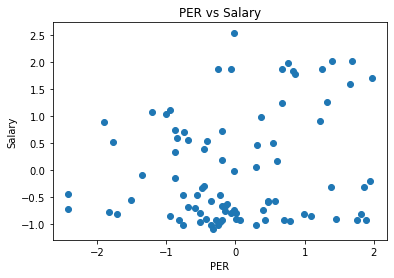

In [9]:
#Standardize PER

std_per = []
per = df['PER']

avg_per = per.mean()
std = np.std(per.values)

for item in per:
    standard = (item - avg_per)/std
    std_per.append(standard)

df['std_PER'] = std_per
df.head()

#Plot

plt.scatter('std_PER', 'std_salary', data = df)
plt.xlabel('PER')
plt.ylabel('Salary')
plt.title('PER vs Salary')
plt.show()


Observing the scatterplot, we can see somewhat of a positive trend in salary as PER increases towards average and slightly above average up till about one standard deviation above the mean. However, there is still a lot of noise we can see, particularly around the bottom of the plot. Let's add a line of best fit with using our regression library:

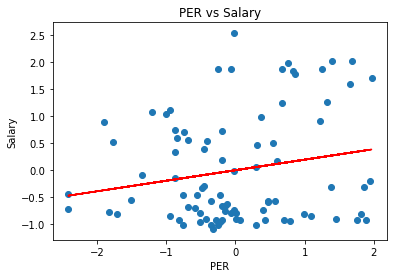

In [10]:
model = LinearRegression()

model.fit(df['std_PER'].values.reshape(-1, 1), df['std_salary'].values)

plt.scatter('std_PER', 'std_salary', data = df)
plt.xlabel('PER')
plt.ylabel('Salary')
plt.title('PER vs Salary')

plt.plot(df['std_PER'].values.reshape(-1, 1), model.predict(df['std_PER'].values.reshape(-1, 1)),color='r')

plt.show()

The regression line is indeed positive! Let's find out more about the model parameters to help our analysis. To do this, we use the statsmodels and scipy libraries: 

In [11]:
Y = df['std_salary']
X = df['std_PER']
X = sm.add_constant(X)
model2 = sm.OLS(Y,X)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             std_salary   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     3.417
Date:                Mon, 16 Dec 2019   Prob (F-statistic):             0.0680
Time:                        17:42:49   Log-Likelihood:                -123.15
No. Observations:                  88   AIC:                             250.3
Df Residuals:                      86   BIC:                             255.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-17      0.106  -6.56e-16      1.000      -0.210       0.210
std_PER        0.1955      0.106      1.848      0.068      -0.015       0.406
==============================================================================
Omnibus:                       11.350   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                8.947
Skew:                           0.673   Prob(JB):                       0.0114
Kurtosis:                       2.206   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's take a moment to analyze what this all means. First of all, the "coef" for  "const" within the table indicates the y-intercept of the line, while the "coef" for "x1" indicates the slope of the line, also interpreted as the correlation coefficeint. As we noticed from the positive regression line, the slope is indeed a positive value: 0.1955. This generally indicates a noticeable, albeit weak correlation. This can probably be attributed to the many other data points, especially around the bottom of the plot that don't necessarily contribute to the positive trend, and lead to higher residuals.

Another valuable statistic that we should note when it comes to analyzing our data is the p-value. A p-value provides insight into whether to lean towards accepting or rejecting the null hypothesis. The null hypothesis is simply a fancy way to describe whether the relationship between our two datasets is simply the way it is due to randomness (accepting the null hypothesis), or whether there could be a legitimate underlying cause behind the relationship (rejecting the null hypothesis). In our case, rejecting the null hypothesis would entail implying that NBA players with a higher PER indeed are compensated with higher salaries. 

We can find the p-value by looking at the "P>|t|" column value for x1. The value 0.068 is above 0.05, which is usually seen as evidence that it doesn't contradict the null hypothesis. However, given the fact that we are dealing with real data and real salaries (which are much more subjective), this is not a bad p-vaule to get.

However, we don't want to stop here. We're trying to come up with a potential metric that's as accurate as possible in indicating a relationship between stats and salary. Although the PER is a standard in the industry to measure overall player performance, it isn't without its shortcomings. Many have criticized the formula for not taking a player's defensive ability on the court into account as much as it should. Therefore, we would like to come up with a scoring that includes the PER, but also includes more defense-based statistics to incorporate within the regression. To accomplish this, we'll need to use a multiple linear regression. 




First, let's examine / regress on a couple relationships amongst the various defensive-oriented player stats and salary. Make sure to standardize the defensive stats!

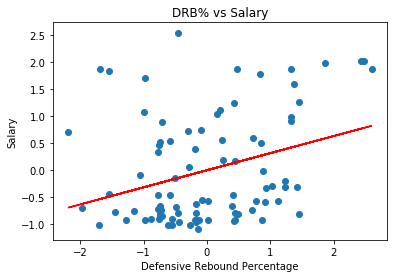

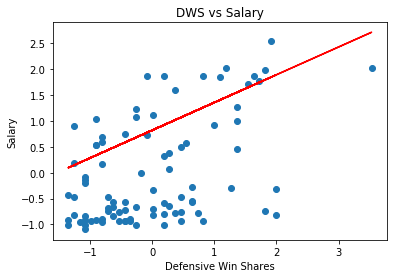

In [12]:
std_drb = []
drb = df['DRB%']

avg_drb = drb.mean()
std = np.std(drb.values)

for item in drb:
    standard = (item - avg_drb)/std
    std_drb.append(standard)
       
std_dws = []
dws = df['DWS']

avg_dws = dws.mean()
std = np.std(dws.values)

for item in dws:
    standard = (item - avg_dws)/std
    std_dws.append(standard)

df['std_DRB'] = std_drb
df['std_DWS'] = std_dws


plt.scatter('std_DRB', 'std_salary', data = df)
plt.xlabel('Defensive Rebound Percentage')
plt.ylabel('Salary')
plt.title('DRB% vs Salary')

model.fit(df['std_DRB'].values.reshape(-1, 1), df['std_salary'].values)
plt.plot(df['std_DRB'].values.reshape(-1, 1), model.predict(df['std_DRB'].values.reshape(-1, 1)),color='r')

plt.show()

plt.scatter('std_DWS', 'std_salary', data = df)
plt.xlabel('Defensive Win Shares')
plt.ylabel('Salary')
plt.title('DWS vs Salary')

model.fit(df['std_DWS'].values.reshape(-1, 1), df['std_salary'].values)
plt.plot(df['std_DWS'].values.reshape(-1, 1), model.predict(df['DWS'].values.reshape(-1, 1)),color='r')

plt.show()

We observe that there are noticeable positive relationships amongst defensive rebound percentages and defensive win shares compared to player salary. This can defintely add to the strength of our overall model. However, let us analyze a few more metrics just to try to get the most accurate possible model for our data. Specifically, we're going to take a look at ORB% (offensive rebound percentage), OWS (offensive win shares), and 3PAr (3 point percentage). This way, we have a better balance of both offensive and defensive metrics. We wanted to include 3 Point percentage especially because of its prevalence in the modern NBA. We will repeat the same steps as above in the following code: 

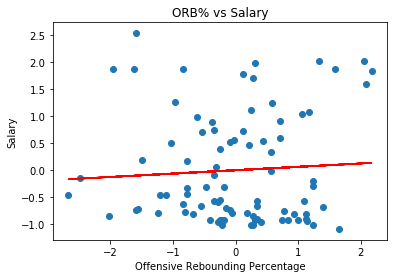

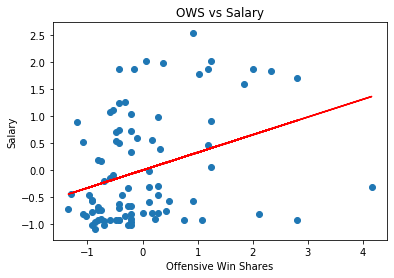

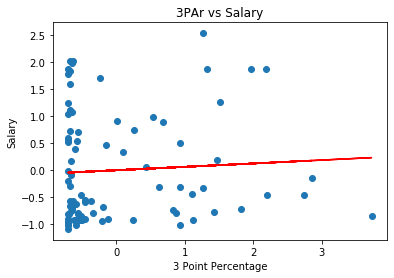

In [13]:
#standardizing ORB
std_orb = []
orb = df['ORB%']

avg_orb = orb.mean()
std = np.std(orb.values)

for item in orb:
    standard = (item - avg_orb)/std
    std_orb.append(standard)

#standardizing OWS
std_ows = []
ows = df['OWS']

avg_ows = ows.mean()
std = np.std(ows.values)

for item in ows:
    standard = (item - avg_ows)/std
    std_ows.append(standard)
    
#standardizing 3PAr
std_threepar = []
threepar = df['3PAr']

avg_threepar = threepar.mean()
std = np.std(threepar.values)

for item in threepar:
    standard = (item - avg_threepar)/std
    std_threepar.append(standard)
    
df['std_ORB'] = std_orb
df['std_OWS'] = std_ows
df['std_3PAr'] = std_threepar

#plotting these metrics vs. salary


plt.scatter('std_ORB', 'std_salary', data = df)
plt.xlabel('Offensive Rebounding Percentage')
plt.ylabel('Salary')
plt.title('ORB% vs Salary')

model.fit(df['std_ORB'].values.reshape(-1, 1), df['std_salary'].values)
plt.plot(df['std_ORB'].values.reshape(-1, 1), model.predict(df['std_ORB'].values.reshape(-1, 1)),color='r')

plt.show()

plt.scatter('std_OWS', 'std_salary', data = df)
plt.xlabel('Offensive Win Shares')
plt.ylabel('Salary')
plt.title('OWS vs Salary')

model.fit(df['std_OWS'].values.reshape(-1, 1), df['std_salary'].values)
plt.plot(df['std_OWS'].values.reshape(-1, 1), model.predict(df['std_OWS'].values.reshape(-1, 1)),color='r')

plt.show()

plt.scatter('std_3PAr', 'std_salary', data = df)
plt.xlabel('3 Point Percentage')
plt.ylabel('Salary')
plt.title('3PAr vs Salary')

model.fit(df['std_3PAr'].values.reshape(-1, 1), df['std_salary'].values)
plt.plot(df['std_3PAr'].values.reshape(-1, 1), model.predict(df['std_3PAr'].values.reshape(-1, 1)),color='r')

plt.show()



As can be seen above, ORB%, OWS, and 3PAr all reflect a positive relationship between the standardized versions of themselves and the standardizied salaries. This means that they could potentially be useful in our model.

To build our multiple linear regression, all it entails is having multiple independent variables: in this case, PER, DWS, DRB%, OWS, ORB%, and 3PAr, in relation with our dependent variable, player salary. We accomplish this using the statsmodels library again. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             std_salary   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     4.801
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           0.000309
Time:                        17:42:50   Log-Likelihood:                -111.48
No. Observations:                  88   AIC:                             237.0
Df Residuals:                      81   BIC:                             254.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.633e-17      0.095     -8e-16      1.000      -0.190       0.190
std_PER       -0.1477      0.139     -1.059      0.293      -0.425       0.130
std_DRB        0.1253      0.124      1.012      0.315      -0.121       0.372
std_DWS        0.4355      0.140      3.114      0.003       0.157       0.714
std_ORB        0.0965      0.152      0.636      0.527      -0.205       0.398
std_OWS        0.0804      0.153      0.524      0.602      -0.225       0.385
std_3PAr       0.1250      0.145      0.861      0.392      -0.164       0.414
==============================================================================
Omnibus:                        7.983   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                4.499
Skew:                           0.361   Prob(JB):                        0.105
Kurtosis:                       2.160   Cond. No.                         3.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

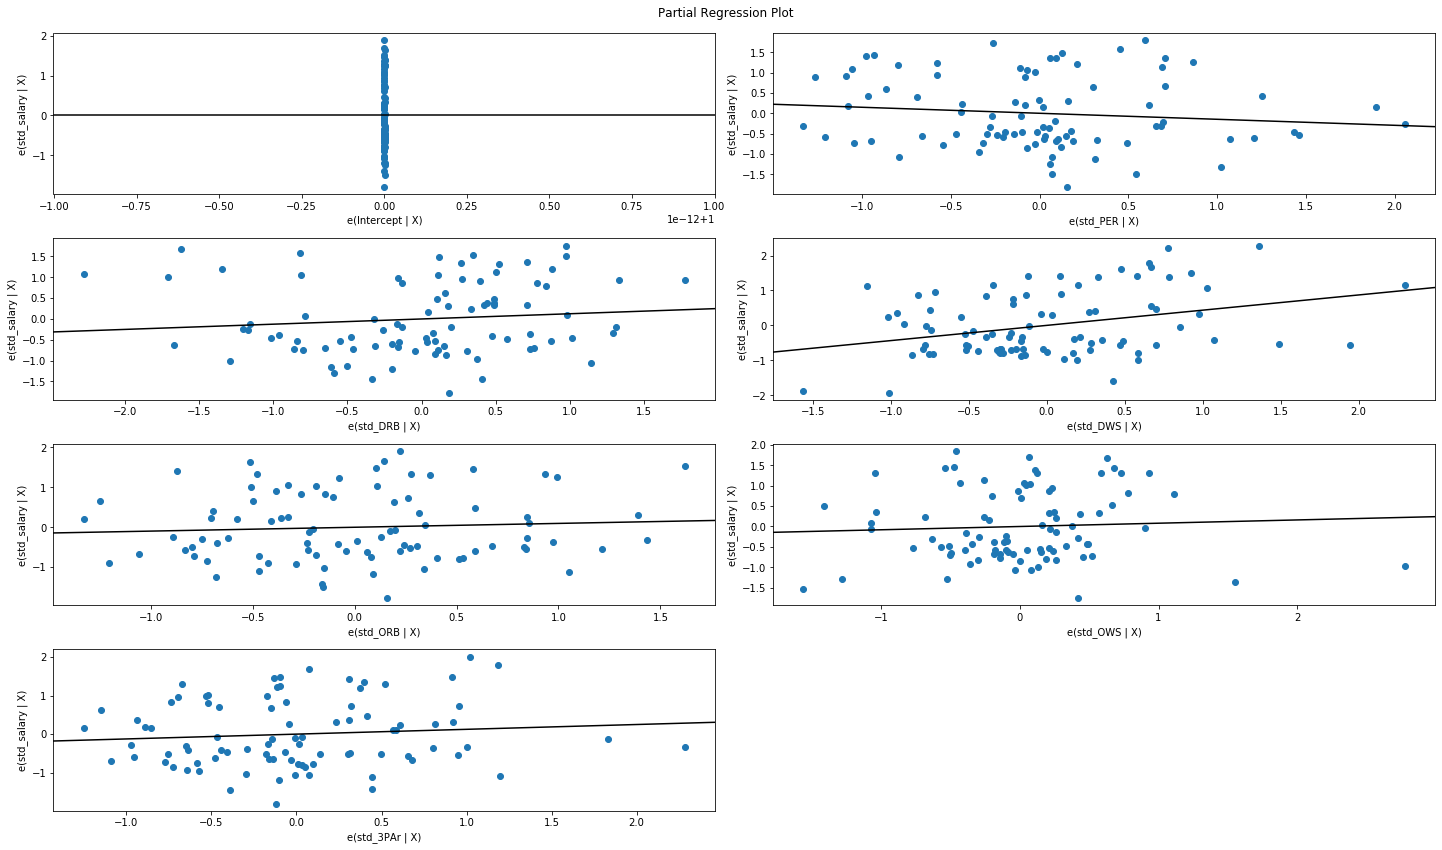

In [14]:
import statsmodels.formula.api as fitter
res = fitter.ols(formula=
                 'std_salary ~ std_PER + std_DRB + std_DWS + std_ORB + std_OWS + std_3PAr', 
                 data=df).fit()

fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(res, fig=fig)
res.summary()


Our multiple regession model has given us a lot more insight into the relationship between player stats and salary. After incorporating more defensive and offensive stats, we can see that the player efficiency rate isn't necessarily as indicative of salary as our initial simple regression model originally suggested. 

Relative to the defensive stats, the positive trend is nowhere to be seen, as seen in the graph for PER above. On the other hand, the defensive stats, particularly defensive win shares, do a much better job indicating the positive relationship with player salary. This can be seen in the graphs, as well as the higher slope / correlation coefficients in the table. The p-values are also even smaller for the defensive win share, implying a contradiction with the null hypothesis, as opposed to the p-value for PER which is around 0.293, making it somewhat ambiguous. Generally, defensive win shares is the only metric that shows a p-value well below 0.05 -- all of the others have higher p-values, indicating the same type of ambiguity. 

We may be seeing this because salaries in general are extremely subjective -- but, we can try our best to use statistics and gain some insights as to why NBA centers are paid so much and what goes into those high salaries!

The R^2 value is another useful statistic to assess the strength of our model, as it relates the variance of the data taken into account by the model compared to the overall variance. It is between 0 and 1, with an amount closer to 1 usually indicating a stronger correlation. Our R^2 value, at .262, is notable but still somewhat low, meaning that we may don't necessarily have a great fit. However, it is also just important to realize that same subjectivity as mentioned before, and there is still a noticeable positive trend to some extend as indicated by the statistics along with p-values below 0.5, so we can still contradict the null hypothesis.

With this data, we now know that in our scoring, although PER may provide a minimal amount of insight and is a standard within the NBA, giving a greater weight to the defensive stats we have taken a look at should account for a more accurate model.

Let's construct a new score that aggregates these independent variables with different weights, and then construct a regression model using that against salary to see if we have come up with a better indicator. 

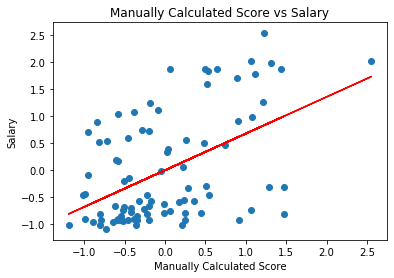

In [15]:
#constructing a 'score' manually by assigning individual weights to each stat, and adding that to a new column 
score_list = []

for index,row in df.iterrows(): 
    score = (0.6*row['std_DWS'] + 0.04*row['std_OWS']+ 0.01*row['std_PER'] + 0.05*row['std_ORB'] 
             + 0.15*row['std_DRB'] + 0.15*row['std_3PAr'])
    score_list.append(score)
    
df['calc_score'] = score_list

plt.scatter('calc_score', 'std_salary', data = df)
plt.xlabel('Manually Calculated Score')
plt.ylabel('Salary')
plt.title('Manually Calculated Score vs Salary')

model.fit(df['calc_score'].values.reshape(-1, 1), df['std_salary'].values)
plt.plot(df['calc_score'].values.reshape(-1, 1), model.predict(df['calc_score'].values.reshape(-1, 1)),color='r')

Now, let's run a single regression for the calculated score (aggregated score with weights assigned to each metric that were based on our multiple regression results) compared to the standardized salary. Let's see what the results are: 

In [16]:
Y = df['std_salary']
X = df['calc_score']
X = sm.add_constant(X)
model2 = sm.OLS(Y,X)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             std_salary   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     28.48
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           7.58e-07
Time:                        17:42:52   Log-Likelihood:                -112.28
No. Observations:                  88   AIC:                             228.6
Df Residuals:                      86   BIC:                             233.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-17      0.093  -7.42e-16      1.000      -0.186       0.186
calc_score     0.6794      0.127      5.337      0.000       0.426       0.932
==============================================================================
Omnibus:                        8.220   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                4.532
Skew:                           0.359   Prob(JB):                        0.104
Kurtosis:                       2.150   Cond. No.                         1.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see, we still get a slightly low R^2, but we also get a very low P value and a much higher overall slope / correlation coefficient! Good news; this provides better evidence for rejecting the null hypothesis. Certainly an imporvement from our previous stats!

***

<h1 style="text-align: center;">Analysis & ML<h1>

There is still one factor we haven't paid sufficient attention to: overfitting. It is unwise to generalize our finding with such a limited dataset to be indicative of player salary within the NBA as a whole. Admittely, even though we are facing some constraints like a relatively small dataset to work with in general, splitting up our data into a "training" and "testing" set, a common practice involving machine learning / regression to limit bias, will provide us with more confidence in our model. 


TO DO: EXPLAIN A BIT MORE ABOUT WHY MACHINE LEARNING / SPLITTING DATASET IS RELEVANT AND HOW IT WORKS


We will now use machine learning techniques in order to predict player salaries (in standardized fashion) based on our calculated score that we manually created (through assigning weights to key metrics). It is important to divide your dataset appropriately regarding how much you use for training and how much you use for actually testing your results Because our dataset is already really small (we only used Centers for the 2017-2018 season), we decided to use 65% of the data for training our model, and 35% for actually testing our results.

First, we again create a target, with our feature being our calc_score metric. 

In [17]:
target = df[['std_salary']]
score_overall = ['calc_score']
features = df[score_overall]

X = features
Y = target['std_salary']

Then, we set 65% of the data for training our model, and 35% for actually testing our results. 

In [18]:
# create training and testing data from same X and Y used in our previous regression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35)

# create and fit the model
lm = LinearRegression()
model = lm.fit(X_train, y_train)

# generate predictions for std_salary to compare with y_test data
predictions = lm.predict(X_test)

# display first 10 results of our predicted player Ratings.
predictions[0:10]

array([-0.10648317,  0.03782068, -0.24795606, -0.1701303 ,  0.65014593,
        1.34316345, -0.30905752,  0.53348363,  0.60767579, -0.38121592])

Now, let's plot the predicted values from our model against the actual values from the data-set (in this case called y_test). We are also adding a green line that indicates how close our predicted values are to the actual values. 


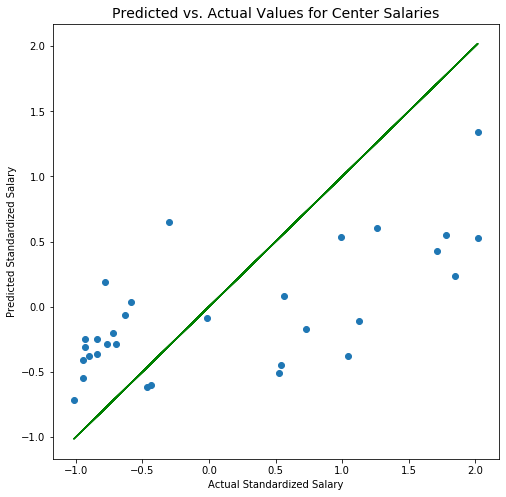

In [19]:
plt.figure(figsize=(8,8))
plt.title("Predicted vs. Actual Values for Center Salaries", fontsize=14)
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, color="Green") # identity line y=x
plt.xlabel("Actual Standardized Salary")
plt.ylabel("Predicted Standardized Salary")
plt.show()

As you can see above, our model somewhat predicted the values of the standardized salaries properly. There does seem to be some variation, but we also allocated 35% of the data for actually testing results -- with better and more extensive data, we may be able to see a better model from a visual perspective.

In [20]:
print("Accuracy (scale of 0 to 1): {}".format(model.score(X_test, y_test)))


Accuracy (scale of 0 to 1): 0.37230834143593394


Here, we actually see an accuracy score of around 30-40%, which is not necessarily ideal. However, it does show that the metrics we looked at certainly DO have a positive effect on predicting a player's salary. 

***

<h1 style="text-align: center;">Conclusion<h1>

Essentially, we realized that it is extremely difficult to predict a player's salary in the NBA -- there are a ton of different factors that probably go into it, including age, reputation, leadership ability, etc -- most of which cannot easily be quantified! Nevertheless, we got a lot of insight and were able to aggregate our custom score using what we learned from regressions to come up with a decent indicator showing the positive relationship with salary!

We were able to clearly see that Defensive Win Shares has the largest effect on player salaries for Centers -- perhaps NBA scouts heavily value the DWS statistic when paying their centers! This does indeed provide a very valuable insight -- NBA centers are paid more on average than other positions because of their defensive abilities. If a Center isn't a good defender, they most likely won't make nearly as much money, which honestly makes sense. Being the tallest guys on the court, they are expected to defend both the perimeter and the paint, so their DWS is certainly a very important metric to look at when evaluating their overall potential impact on a team. 

We were surprised to see that Offensive statistics didn't necessarily correlate to a ton of their salary -- especially in the modern day, where offense is so important (just take a look at Stephen Curry and James Harden, who are known for being mediocre defenders but fantastic offensive players). However, we were able to see that, because of their defensive abilities, NBA centers are paid a lot. It is harder to find such tall individuals that can contribute a lot on defense, which is probably why they are compensated more than everyone else on the court!

Thank you for reading! Hope you enjoyed :)

Other valuable links we consulted: 

https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/

https://datatofish.com/multiple-linear-regression-python/

https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c

http://www.chicagonow.com/bullsville/2013/09/the-bulls-per-and-the-idiots-who-live-by-it/

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6